### Import Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # Numerical computations
import pandas as pd  # Data manipul* ation
import matplotlib.pyplot as plt  # Visualizations
import seaborn as sns  # Advanced visualizations

### Load Cleaned Dataset

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv")

In [3]:
#1. Check the structure of the dataset:
#Look for missing values, data types, and basic statistics.
# Check the data types and missing values
data.info()

# Display basic statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   2544 non-null   object 
 1   US Gross                2544 non-null   float64
 2   Worldwide Gross         2544 non-null   float64
 3   US DVD Sales            2544 non-null   float64
 4   Production Budget       2544 non-null   float64
 5   Release Date            2537 non-null   object 
 6   MPAA Rating             2452 non-null   object 
 7   Running Time (min)      2544 non-null   float64
 8   Distributor             2544 non-null   object 
 9   Source                  2544 non-null   object 
 10  Major Genre             2544 non-null   object 
 11  Creative Type           2544 non-null   object 
 12  Director                2544 non-null   object 
 13  Rotten Tomatoes Rating  2544 non-null   float64
 14  IMDB Rating             2544 non-null   

Title                      0
US Gross                   0
Worldwide Gross            0
US DVD Sales               0
Production Budget          0
Release Date               7
MPAA Rating               92
Running Time (min)         0
Distributor                0
Source                     0
Major Genre                0
Creative Type              0
Director                   0
Rotten Tomatoes Rating     0
IMDB Rating                0
IMDB Votes                 0
Release Year               7
Profit                     0
ROI                        0
dtype: int64

In [4]:
# Convert 'Release Date' back to datetime
data["Release Date"] = pd.to_datetime(data["Release Date"], errors='coerce')

# Convert 'MPAA Rating' back to category
rating_order = ["unknown", "g", "pg", "pg-13", "r", "nc-17"]
data["MPAA Rating"] = pd.Categorical(data["MPAA Rating"], categories=rating_order, ordered=True)

# Confirm the data types
print(data.dtypes)

Title                             object
US Gross                         float64
Worldwide Gross                  float64
US DVD Sales                     float64
Production Budget                float64
Release Date              datetime64[ns]
MPAA Rating                     category
Running Time (min)               float64
Distributor                       object
Source                            object
Major Genre                       object
Creative Type                     object
Director                          object
Rotten Tomatoes Rating           float64
IMDB Rating                      float64
IMDB Votes                       float64
Release Year                     float64
Profit                           float64
ROI                              float64
dtype: object


In [5]:
# Handle missing values:
# Decide how to handle missing values: remove rows, impute missing values, or ignore certain columns.
# Drop rows with missing 'Release Year'
data = data.dropna(subset=['Release Year'])

# We could fill missing values in MPAA Rating column. Here I chose to not do it.
# data['MPAA Rating'].fillna('Unknown', inplace=True)

### Sentiment Analysis on Movie Titles or Descriptions

#### Step 1. Sentiment Analysis Setup:

We'll use the TextBlob library for sentiment analysis. It provides a simple API to analyze the polarity (positive/negative) and subjectivity (how subjective the text is) of text. We'll classify the sentiment into three categories:

* Positive: Polarity > 0
* Neutral: Polarity = 0
* Negative: Polarity < 0

#### Step 2. Perform Sentiment Analysis on Movie Titles or Descriptions:

We’ll apply sentiment analysis on the Title column (or the Description column if available) and classify each movie title into one of the sentiment categories.

In [6]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    # Perform sentiment analysis using TextBlob
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    
    # Classify sentiment based on polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment classification on movie titles or descriptions
data['Sentiment'] = data['Title'].apply(get_sentiment)  # Replace 'Title' with 'Description' if available

# Check the sentiment distribution
print(data['Sentiment'].value_counts())

Neutral     2091
Positive     246
Negative     200
Name: Sentiment, dtype: int64


* Neutral: 2091 movie titles were classified as having a neutral sentiment. This is the dominant category.
* Positive: 246 movie titles were classified as having a positive sentiment.
* Negative: 200 movie titles were classified as having a negative sentiment.

Analysis:
* Dominance of Neutral Titles: The overwhelming majority of movie titles are classified as neutral. This is common because movie titles often focus on names, places, or abstract concepts that don't inherently carry strong positive or negative sentiment.
* Relatively Balanced Positive and Negative: The number of positive and negative titles is relatively close, suggesting that movies with both positive and negative connotations are produced in similar quantities.
* Limitations of Sentiment Analysis on Titles: It's important to remember that sentiment analysis applied to titles might not fully capture the actual sentiment of the movie's content. Titles can be misleading or intentionally vague.

Possible Next Steps:
* Sentiment Analysis on Descriptions: If available, performing sentiment analysis on movie descriptions would likely provide a more accurate representation of the movie's sentiment.
* Contextual Analysis: For more nuanced sentiment analysis, consider using more advanced techniques that take into account context, sarcasm, and other linguistic nuances.
* Correlation Analysis: we could explore the correlation between sentiment (from titles or descriptions) and other movie metrics like ratings, revenue, or profit.

#### Step 3. Correlation of Sentiment with Profit, ROI, and Ratings:

Now that we have classified each movie into one of the sentiment categories, we can investigate how sentiment correlates with performance metrics such as Profit, ROI, and Ratings.

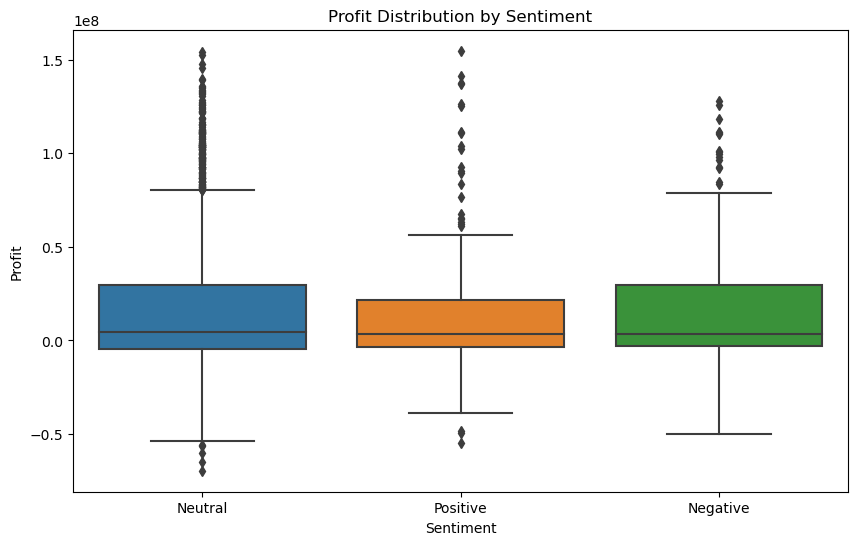

In [7]:
# 1. Sentiment vs Profit
# Box plot for Profit based on Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Profit', data=data)
plt.title('Profit Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Profit')
plt.show()

Median Profit:
* Neutral: The median profit for movies with neutral titles is slightly above zero, indicating that the typical movie in this category breaks even or makes a small profit.
* Positive: The median profit for movies with positive titles is also slightly above zero, similar to the neutral category.
* Negative: The median profit for movies with negative titles is slightly lower than the other two categories, but still close to zero.

Interquartile Range (IQR):
* The IQRs for all three categories are relatively similar, indicating a comparable spread of profits within the middle 50% of each group.

Spread:
* All three categories exhibit a wide spread of profits, with some movies experiencing significant losses and others achieving substantial profits.

Skewness:
* All three categories are highly skewed to the right, indicating that while many movies break even or make small profits, a few highly successful movies generate the bulk of the profits.

Outliers:
* All three categories have numerous outliers, especially on the positive end, representing blockbuster hits or highly successful movies that generated exceptional profits.
* Neutral and Positive categories also have outliers on the negative end, representing movies that experienced significant financial losses.

Key Takeaways:
* Sentiment of Title Does Not Strongly Predict Profit: The sentiment of a movie's title (as determined by TextBlob) does not appear to be a strong predictor of its profitability. The distributions of profits across the three sentiment categories are quite similar.
* Blockbuster Effect Dominates: The presence of numerous outliers, especially on the positive end, highlights the "blockbuster effect" where a small number of movies generate a disproportionately large share of the total revenue, regardless of the sentiment of their titles.
* High-Risk, High-Reward: All three categories exhibit a wide range of profitability, indicating the high-risk, high-reward nature of the film industry.

This box plot shows that the sentiment of a movie's title (as classified by TextBlob) has limited influence on its profitability. The distribution of profits is largely driven by the "blockbuster effect" and the inherent volatility of the film industry.

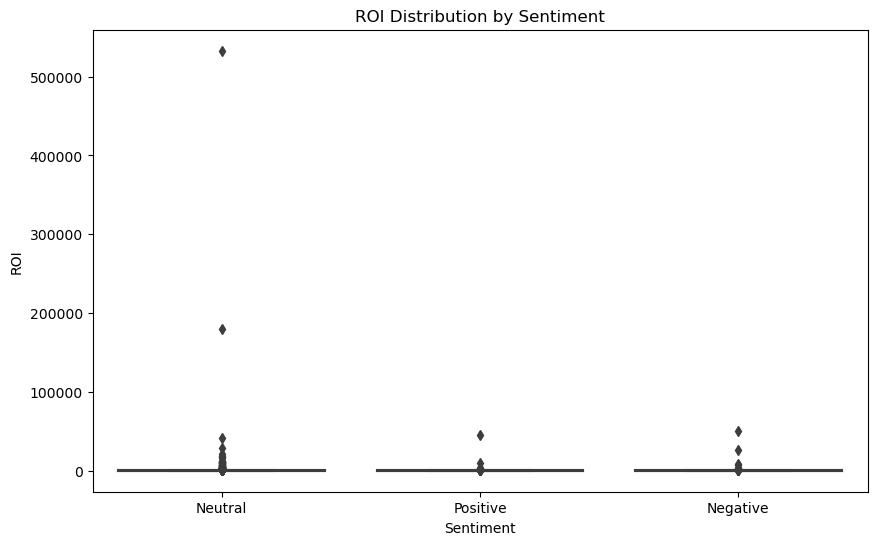

In [8]:
# 2. Sentiment vs ROI
# Box plot for ROI based on Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='ROI', data=data)
plt.title('ROI Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('ROI')
plt.show()

Median ROI:
* Neutral: The median ROI for movies with neutral titles is very close to zero.
* Positive: The median ROI for movies with positive titles is also very close to zero.
* Negative: The median ROI for movies with negative titles is also very close to zero.

Interquartile Range (IQR):
* The IQRs for all three categories are very small, indicating a narrow range of ROI values within the middle 50% of each group, all clustered very close to zero.

Spread:
* The whiskers for all three categories are also very short, suggesting that most movies in each category have very low ROIs.

Outliers:
* All three categories have outliers, but they are relatively few.
* The outliers in the "Neutral" category show significantly higher ROIs than the other categories.

Key Takeaways:
* Majority of Movies Have Very Low ROI: The overwhelming majority of movies in all three sentiment categories have very low ROIs, clustered around zero.
* Sentiment Does Not Strongly Predict ROI: Similar to the profit distribution, the sentiment of a movie's title does not appear to be a strong predictor of its ROI. The distributions of ROI across the three sentiment categories are very similar.
* Outliers Suggest Occasional High ROI: The presence of outliers, especially in the "Neutral" category, indicates that some movies, regardless of title sentiment, can achieve exceptionally high ROIs. However, these are rare occurrences.

This box plot shows that the ROI for most movies is very low, regardless of the sentiment of their titles. The data suggests that the film industry is generally not a high-ROI endeavor, and that the sentiment of a movie's title has little influence on its financial returns.

Important Note: The chart's y-axis scale is unusual, with very large values and very small variations in the boxes and whiskers. This suggests that the ROI data might be scaled in an unconventional way. If possible, understanding the specific calculation and scaling of ROI would improve the interpretation.

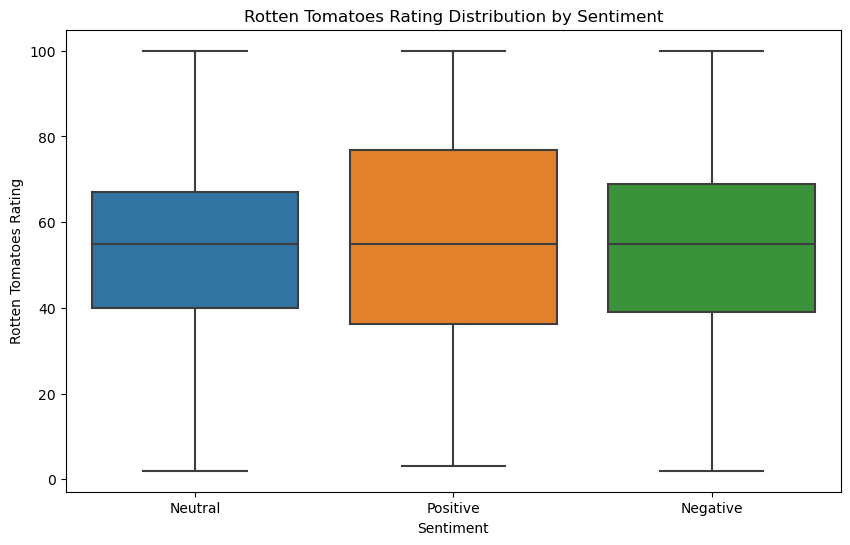

In [9]:
# 3. Sentiment vs Ratings (Rotten Tomatoes, IMDB)
# Box plot for Rotten Tomatoes Rating based on Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Rotten Tomatoes Rating', data=data)
plt.title('Rotten Tomatoes Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rotten Tomatoes Rating')
plt.show()

Median Rotten Tomatoes Rating:
* Positive: The median Rotten Tomatoes Rating for movies with positive titles is the highest among the three categories.
* Neutral: The median Rotten Tomatoes Rating for movies with neutral titles is slightly lower than the positive category.
* Negative: The median Rotten Tomatoes Rating for movies with negative titles is the lowest among the three categories.

Interquartile Range (IQR):
* The IQRs for all three categories are relatively similar, indicating a comparable spread of Rotten Tomatoes Ratings within the middle 50% of each group.

Spread:
* All three categories exhibit a wide spread of Rotten Tomatoes Ratings, ranging from very low to very high scores.

Overall Trend:
* There is a slight trend of decreasing median Rotten Tomatoes Ratings as sentiment goes from positive to neutral to negative.

Key Takeaways:
* Positive Titles Correlate with Higher Ratings: Movies with positively-sentimented titles tend to have slightly higher Rotten Tomatoes Ratings on average compared to movies with neutral or negatively-sentimented titles.
* Sentiment Has a Weak Influence on Ratings: While there is a trend, the differences in median ratings are not dramatic, suggesting that the sentiment of a movie's title has a relatively weak influence on its critical reception.
* Wide Range of Ratings Within Sentiment Categories: All three sentiment categories contain movies with a wide range of Rotten Tomatoes Ratings, indicating that factors other than title sentiment are more significant in determining critical reception.

This box plot suggests that while there is a slight tendency for movies with positive titles to receive higher Rotten Tomatoes Ratings, the sentiment of a movie's title is not a strong predictor of its critical reception. Other factors, such as the quality of the film itself, marketing, and audience preferences, are likely to play a more significant role.

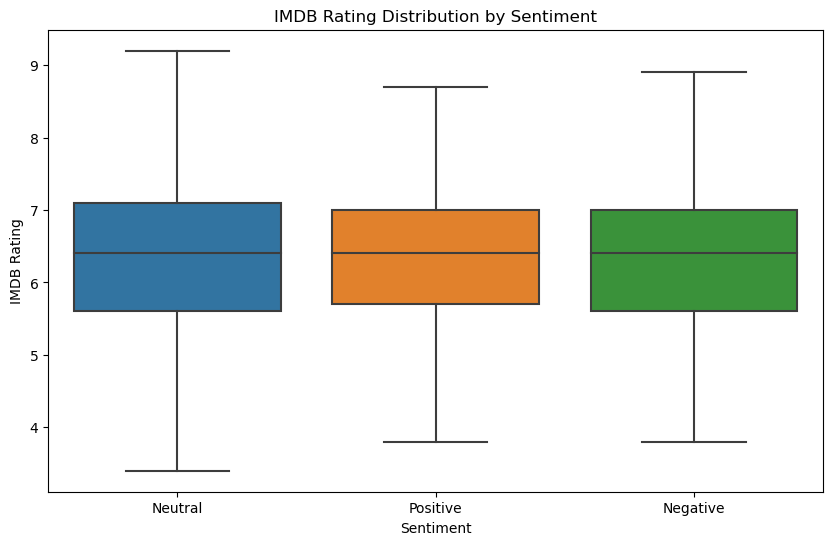

In [10]:
# Box plot for IMDB Rating based on Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='IMDB Rating', data=data)
plt.title('IMDB Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('IMDB Rating')
plt.show()

Median IMDB Rating:
* Neutral: The median IMDB Rating for movies with neutral titles is the highest among the three categories.
* Positive: The median IMDB Rating for movies with positive titles is slightly lower than the neutral category.
* Negative: The median IMDB Rating for movies with negative titles is slightly lower than the positive category.

Interquartile Range (IQR):
* The IQRs for all three categories are relatively similar, indicating a comparable spread of IMDB Ratings within the middle 50% of each group.

Spread:
* All three categories exhibit a wide spread of IMDB Ratings, ranging from relatively low to relatively high scores.

Overall Trend:
* There is a slight trend of decreasing median IMDB Ratings as sentiment goes from neutral to positive to negative.

Key Takeaways:
* Neutral Titles Correlate with Slightly Higher Ratings: Movies with neutrally-sentimented titles tend to have slightly higher IMDB Ratings on average compared to movies with positive or negatively-sentimented titles.
* Sentiment Has a Weak Influence on Ratings: While there is a trend, the differences in median ratings are not dramatic, suggesting that the sentiment of a movie's title has a relatively weak influence on its user ratings.
* Wide Range of Ratings Within Sentiment Categories: All three sentiment categories contain movies with a wide range of IMDB Ratings, indicating that factors other than title sentiment are more significant in determining user reception.

This box plot suggests that while there is a slight tendency for movies with neutral titles to receive higher IMDB Ratings, the sentiment of a movie's title is not a strong predictor of its user reception. Other factors, such as the quality of the film itself, marketing, and audience preferences, are likely to play a more significant role.

Important Note: The trend observed in this chart is the opposite of the trend observed in the Rotten Tomatoes Rating Distribution by Sentiment chart. This suggests that the relationship between title sentiment and critical vs. user reception might differ.

#### Step 4. Investigate Sentiment's Impact on Movie Performance:

We will compare the mean performance metrics for each sentiment category to see if movies with certain sentiment profiles perform better or worse in terms of profit, ROI, and ratings.

In [11]:
# Group by Sentiment and calculate the mean of relevant metrics
sentiment_performance = data.groupby('Sentiment')[['Profit', 'ROI', 'Rotten Tomatoes Rating', 'IMDB Rating']].mean()

# Display the performance statistics by sentiment
print(sentiment_performance)

                 Profit         ROI  Rotten Tomatoes Rating  IMDB Rating
Sentiment                                                               
Negative   1.654972e+07  631.568259               53.875000     6.284000
Neutral    1.600589e+07  681.005343               53.804878     6.316212
Positive   1.341611e+07  409.140462               55.199187     6.386992


Profit:
* The average profit is highest for movies with 'Negative' sentiment titles (1.65e+07), followed closely by 'Neutral' (1.60e+07), and then 'Positive' (1.34e+07).
* While there are differences, the average profit is in a similar range across all sentiment categories.

ROI (Return on Investment):
* The average ROI is highest for movies with 'Neutral' sentiment titles (681), followed by 'Negative' (631), and then 'Positive' (409).
* Again, 'Neutral' titles show the best performance, but the differences aren't drastic except for 'Positive' titles having a notably lower ROI.

Rotten Tomatoes Rating:
* The average Rotten Tomatoes Rating is highest for movies with 'Positive' sentiment titles (55.2), followed by 'Negative' (53.9), and then 'Neutral' (53.8).
* 'Positive' titles have a slightly better average rating, but the overall ratings are quite close.

IMDB Rating:
* The average IMDB Rating is highest for movies with 'Positive' sentiment titles (6.39), followed by 'Neutral' (6.32), and then 'Negative' (6.28).
* 'Positive' titles have a slight edge in user ratings, but again, the differences are small.

Interpretation:
* Sentiment of movie titles, as classified by TextBlob, does not show a very strong correlation with movie performance metrics.
* 'Neutral' titles tend to have a slightly better ROI, while 'Positive' titles tend to have slightly better average ratings (Rotten Tomatoes and IMDB).
* Differences in average profit and ratings across sentiment categories are relatively small.

#### Step 5. Visualize Sentiment Distribution Across Genres or Release Years:

We can also examine how sentiment is distributed across different genres or release years to see if certain genres or release years tend to have more positive or negative sentiment.

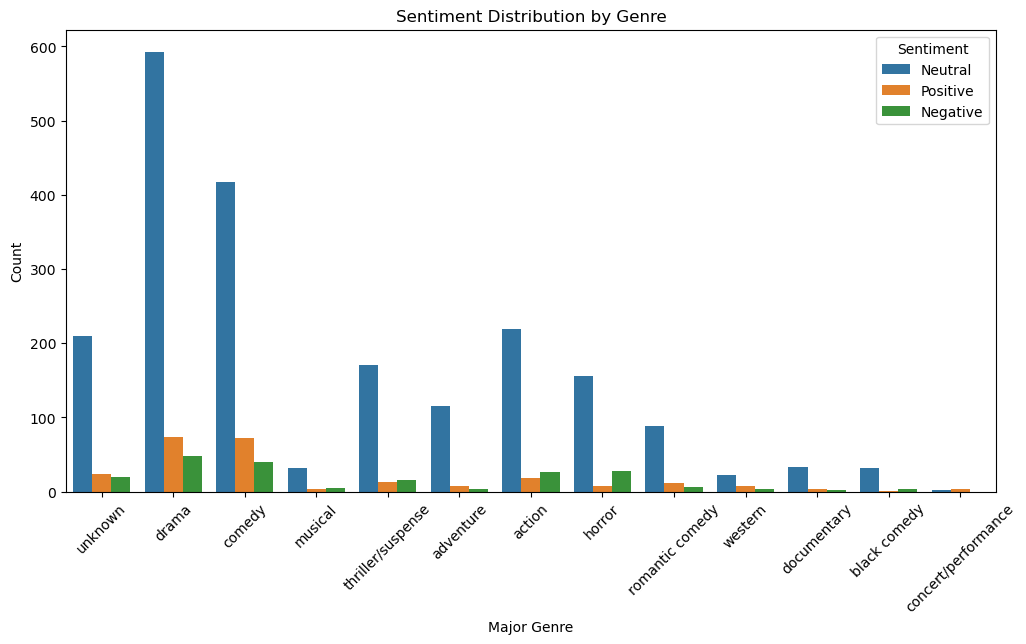

In [12]:
# 1. Sentiment by Genre:
# Box plot for sentiment distribution by genre
plt.figure(figsize=(12, 6))
sns.countplot(x='Major Genre', hue='Sentiment', data=data)
plt.title('Sentiment Distribution by Genre')
plt.xlabel('Major Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Dominance of Neutral Sentiment: Across almost all genres, the Neutral sentiment category (blue bars) is dominant. This confirms our previous observation that most movie titles are classified as neutral.
* Genre Variations in Sentiment: There are some variations in the distribution of Positive and Negative sentiment across genres:
    * Drama: Shows a significant number of Positive sentiment titles compared to other genres.
    * Comedy: Shows a relatively higher proportion of Positive sentiment titles compared to Negative.
    * Action: Shows a notable number of Negative sentiment titles, though Neutral remains dominant.
    * Horror: Shows a relatively higher proportion of Negative sentiment titles compared to other genres.
* Low Counts in Some Genres: Genres like 'unknown', 'musical', 'adventure', 'romantic comedy', 'western', 'documentary', 'black comedy', and 'concert/performance' have relatively low counts of movies in general, making it harder to draw strong conclusions about sentiment distribution within these genres.
* Overall Trend: The overall trend reinforces the idea that the sentiment of movie titles, as determined by TextBlob, is largely neutral. However, there are some genre-specific variations that might be worth exploring further.

Key Takeaways:
* Neutral Titles Prevail: The majority of movie titles, regardless of genre, are classified as neutral.
* Genre Influences Sentiment Distribution: While neutral titles dominate, some genres show a higher proportion of positive or negative titles.
* Drama and Comedy Lean Positive: Drama and comedy genres seem to have a higher prevalence of positive sentiment titles.
* Action and Horror Lean Negative: Action and horror genres show a higher prevalence of negative sentiment titles, though neutral remains dominant.
* Low Sample Sizes: Some genres have low movie counts, making it difficult to draw definitive conclusions.

In [ ]:
# 2. Sentiment by Release Year

# Convert 'Release Year' to integer
data['Release Year'] = data['Release Year'].astype(int)

# Box plot for sentiment distribution by release year
plt.figure(figsize=(20, 8))
sns.countplot(x='Release Year', hue='Sentiment', data=data)
plt.title('Sentiment Distribution by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* Dominance of Neutral Sentiment: Across almost all release years, the Neutral sentiment category (blue bars) is dominant. This confirms our previous observation that most movie titles are classified as neutral.
* Fluctuations Over Time: The number of movies released each year varies significantly, leading to fluctuations in the number of movies within each sentiment category.
* Significant Peak Around 2005-2007: There's a very prominent peak in the number of movies released around 2005-2007, with a large majority of them being classified as Neutral. This suggests a surge in movie production during that period.
* Sparse Data in Earlier and Later Years: The data is quite sparse in earlier release years and in later years (particularly after 2011), making it difficult to draw strong conclusions about sentiment trends in those periods.
* Low Positive and Negative Counts: The counts of Positive and Negative sentiment titles are generally very low compared to Neutral titles across all years.
* Overall Trend: The overall trend reinforces the idea that the sentiment of movie titles, as determined by TextBlob, is largely neutral over time. The fluctuations in counts are primarily driven by the overall number of movies released in each year.

Key Takeaways:
* Neutral Titles Prevail Over Time: The majority of movie titles, regardless of release year, are classified as neutral.
* Production Peak Around 2005-2007: There was a significant surge in movie production around 2005-2007, with most titles being neutral.
* Sparse Data in Certain Periods: Data is limited in earlier and later release years, making it difficult to analyze sentiment trends in those periods.
* Low Counts of Positive and Negative Titles: The counts of positive and negative titles are consistently low compared to neutral titles.

Possible Further Exploration:
* External Factors: Explore if there were any external factors (e.g., economic conditions, technological advancements) that might have influenced movie production and title sentiment during the observed periods.

#### Step 6. Investigate Outliers in Sentiment and Performance:

We can check for any anomalies or outliers in the sentiment or performance metrics using box plots, to ensure that no extreme cases are skewing the analysis.

In [ ]:
# Box plot for Profit to detect any outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sentiment'], y=data['Profit'])
plt.title('Profit Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Profit')
plt.show()

* Sentiment of Title Does Not Strongly Predict Profit: The sentiment of a movie's title (as determined by TextBlob) does not appear to be a strong predictor of its profitability. The distributions of profits across the three sentiment categories are quite similar.
* Blockbuster Effect Dominates: The presence of numerous outliers, especially on the positive end, highlights the "blockbuster effect" where a small number of movies generate a disproportionately large share of the total revenue, regardless of the sentiment of their titles.
* High-Risk, High-Reward: All three categories exhibit a wide range of profitability, indicating the high-risk, high-reward nature of the film industry.

* Median Profit:
    * Neutral: The median profit for movies with neutral titles is slightly above zero, indicating that the typical movie in this category breaks even or makes a small profit.
    * Positive: The median profit for movies with positive titles is also slightly above zero, similar to the neutral category.
    * Negative: The median profit for movies with negative titles is slightly lower than the other two categories, but still close to zero.
    
* Interquartile Range (IQR): The IQRs for all three categories are relatively similar, indicating a comparable spread of profits within the middle 50% of each group.
* Spread: All three categories exhibit a wide spread of profits, with some movies experiencing significant losses and others achieving substantial profits.
* Skewness: All three categories are highly skewed to the right, indicating that while many movies break even or make small profits, a few highly successful movies generate the bulk of the profits.
* Outliers: All three categories have numerous outliers, especially on the positive end, representing blockbuster hits or highly successful movies that generated exceptional profits. All categories also have outliers on the negative end, representing movies that experienced significant financial losses.

This box plot shows that the sentiment of a movie's title (as classified by TextBlob) has limited influence on its profitability. The distribution of profits is largely driven by the "blockbuster effect" and the inherent volatility of the film industry.

In [ ]:
# Box plot for ROI to detect any outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Sentiment'], y=data['ROI'])
plt.title('ROI Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('ROI')
plt.show()

* Majority of Movies Have Very Low ROI: The overwhelming majority of movies in all three sentiment categories have very low ROIs, clustered around zero.
* Sentiment Does Not Strongly Predict ROI: Similar to the profit distribution, the sentiment of a movie's title does not appear to be a strong predictor of its ROI. The distributions of ROI across the three sentiment categories are very similar.
* Outliers Suggest Occasional High ROI: The presence of outliers, especially in the "Neutral" category, indicates that some movies, regardless of title sentiment, can achieve exceptionally high ROIs. However, these are rare occurrences.

* Median ROI:
    * Neutral: The median ROI for movies with neutral titles is very close to zero.
    * Positive: The median ROI for movies with positive titles is also very close to zero.
    * Negative: The median ROI for movies with negative titles is also very close to zero.

* Interquartile Range (IQR): The IQRs for all three categories are very small, indicating a narrow range of ROI values within the middle 50% of each group, all clustered very close to zero.
* Spread: The whiskers for all three categories are also very short, suggesting that most movies in each category have very low ROIs.
* Outliers: All three categories have outliers, but they are relatively few. The outliers in the "Neutral" category show significantly higher ROIs than the other categories.

This box plot shows that the ROI for most movies is very low, regardless of the sentiment of their titles. The data suggests that the film industry is generally not a high-ROI endeavor, and that the sentiment of a movie's title has little influence on its financial returns.